# **Laboratorijska vježba 5**: Zadaci za samostalni rad

## **Predviđanje prodaje iz troškova oglasa**

U ovoj laboratorijskoj vježbi istražit ćemo skup podataka koji sadrži informacije o oglasima u kojima se prodaju određeni proizvodi, a objavljuju se na medijima poput TV-a, radija i novina. Skup podataka sadrži sljedeće stupce:

* TV - cijena za oglašavanje na TV-u za jedan proizvod na određenom tržištu (u tisućama dolara).
* Radio - cijena za oglašavanje na radiju za isti proizvod.
* Newspaper - cijena za oglašavanje u novinama za isti proizvod.
* Sales - prodaja jednog proizvoda na određenom tržištu (u tisućama jedinica).



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('Data/Advertising.csv', index_col=0)
data.head()
data

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


## **Zadatak 1: Linearna regresija: predviđanje prodaje iz troškova oglasa**

Podijelite skup podataka na podskupove za trening i test. Definirajte model linearne regresije pomoću svih značajki, bez izvođenja bilo kakvih transformacija nad značajkama. Istrenirajte model te izračunajte MSE na podskupovima za trening i test.

In [3]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

feature_cols = data.columns[:-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression().fit(X_train, y_train)

# Predviđene  trening i testnim vrijednosti:
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

print('MSE na treningu:', mean_squared_error(y_train, y_train_predicted))
print('MSE na testnom skupu podataka:', mean_squared_error(y_test, y_test_predicted))

MSE na treningu: 2.4793551789057866
MSE na testnom skupu podataka: 3.79679723671522


Ispišite jednadžbu modela koristeći izračunate koeficijente.

In [4]:
for f in range(len(feature_cols)):
    print("{0} * {1} + ".format(model.coef_[f], feature_cols[f]))
print(model.intercept_)

0.04405928095746522 * TV + 
0.19928749689893954 * radio + 
0.006882452222275487 * newspaper + 
2.7089490925159065


Nacrtajte dijagram raspršenosti između stvarnih i predviđenih vrijednosti izlazne varijable za podskupove za trening i test.

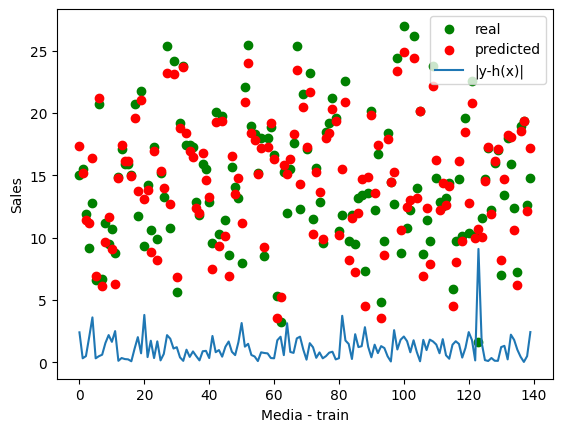

In [5]:
X_train_val=np.arange(0,len(X_train),1)
diff = np.abs(y_train - y_train_predicted)
plt.scatter(X_train_val, y_train, c='g',label='real')
plt.scatter(X_train_val, y_train_predicted, c='r', label='predicted')
plt.plot(X_train_val, diff, label='|y-h(x)|')
plt.xlabel('Media - train')
plt.ylabel('Sales')
plt.legend()
plt.show()

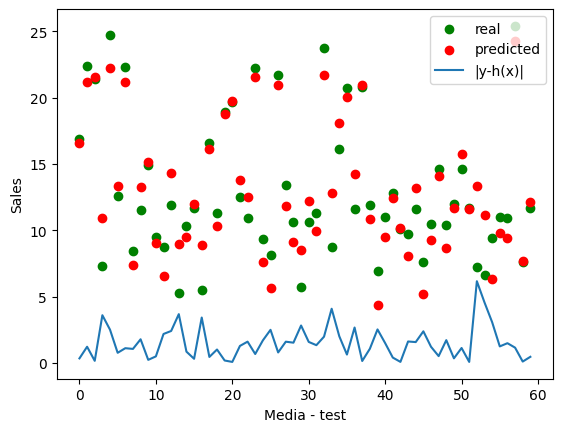

In [6]:
X_test_val=np.arange(0,len(X_test),1)
diff = np.abs(y_test - y_test_predicted)
plt.scatter(X_test_val, y_test, c='g',label='real')
plt.scatter(X_test_val, y_test_predicted, c='r', label='predicted')
plt.plot(X_test_val, diff, label='|y-h(x)|')
plt.xlabel('Media - test')
plt.ylabel('Sales')
plt.legend()
plt.show()

_____________________________________________________________________
Vidljivo je da se poveća rezidual na testnim podacima, veći je MSE jer su to podaci koji se nisu koristili za izradu modela.
_____________________________________________________________________

## **Zadatak 2: Nelinearna regresija: predviđanje prodaje iz troškova oglasa**

Definirajte model nelinearne (polinomijalne) regresije sa stupnjem polinoma 2, 3, 5 i 10 bez uključivanja interakcijskih članova. Koristite klasu PolynomialFeatures iz modula preprocessing iz biblioteke scikit-learn. Istrenirajte model te izračunajte MSE na podskupovima za trening i test.

In [7]:
from sklearn.preprocessing import PolynomialFeatures

poly2 = PolynomialFeatures(2)
poly3 = PolynomialFeatures(3)
poly5 = PolynomialFeatures(5)
poly10 = PolynomialFeatures(10)

X_train2 = poly2.fit_transform(X_train)
X_test2 =  poly2.fit_transform(X_test)

model2 = LinearRegression().fit(X_train2, y_train)

# Predviđene  trening i testnim vrijednosti:
y_train_predicted2 = model2.predict(X_train2)
y_test_predicted2 = model2.predict(X_test2)

print('MSE na treningu, polinom 2.reda:', mean_squared_error(y_train, y_train_predicted2))
print('MSE na testnom skupu podataka, polinom 2.reda:', mean_squared_error(y_test, y_test_predicted2))

MSE na treningu, polinom 2.reda: 0.35410977541934024
MSE na testnom skupu podataka, polinom 2.reda: 0.5231944949055658


In [8]:
X_train3 = poly3.fit_transform(X_train)
X_test3 =  poly3.fit_transform(X_test)

model3 = LinearRegression().fit(X_train3, y_train)

# Predviđene  trening i testnim vrijednosti:
y_train_predicted3 = model3.predict(X_train3)
y_test_predicted3 = model3.predict(X_test3)

print('MSE na treningu, polinom 3.reda:', mean_squared_error(y_train, y_train_predicted3))
print('MSE na testnom skupu podataka, polinom 3.reda:', mean_squared_error(y_test, y_test_predicted3))

MSE na treningu, polinom 3.reda: 0.21984452631177434
MSE na testnom skupu podataka, polinom 3.reda: 0.29077449153131163


In [9]:
X_train5 = poly5.fit_transform(X_train)
X_test5 =  poly5.fit_transform(X_test)

model5 = LinearRegression().fit(X_train5, y_train)

# Predviđene  trening i testnim vrijednosti:
y_train_predicted5 = model5.predict(X_train5)
y_test_predicted5 = model5.predict(X_test5)

print('MSE na treningu, polinom 5.reda:', mean_squared_error(y_train, y_train_predicted5))
print('MSE na testnom skupu podataka, polinom 5.reda:', mean_squared_error(y_test, y_test_predicted5))

MSE na treningu, polinom 5.reda: 0.14980929022223635
MSE na testnom skupu podataka, polinom 5.reda: 46.96618991927361


In [10]:
X_train10 = poly10.fit_transform(X_train)
X_test10 =  poly10.fit_transform(X_test)

model10 = LinearRegression().fit(X_train10, y_train)

# Predviđene  trening i testnim vrijednosti:
y_train_predicted10 = model10.predict(X_train10)
y_test_predicted10 = model10.predict(X_test10)

print('MSE na treningu, polinom 10.reda:', mean_squared_error(y_train, y_train_predicted10))
print('MSE na testnom skupu podataka, polinom 10.reda:', mean_squared_error(y_test, y_test_predicted10))

MSE na treningu, polinom 10.reda: 0.02483210520179272
MSE na testnom skupu podataka, polinom 10.reda: 253620947145.9207


______________________________________________________
Najbolje vrijednosti MSE-a za testni skup 
ispadne polinom 3. reda.
______________________________________________________

Iscrtajte izračunate vrijednosti MSE (na treningu i testu) u ovisnosti o složenosti modela. Koristite linijski dijagram. 

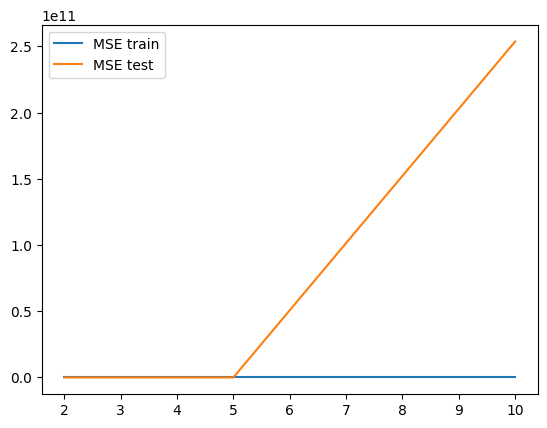

In [11]:
polinom=[2,3,5,10]

MSE_train_2 = mean_squared_error(y_train, y_train_predicted2)
MSE_train_3 = mean_squared_error(y_train, y_train_predicted3)
MSE_train_5 = mean_squared_error(y_train, y_train_predicted5)
MSE_train_10 = mean_squared_error(y_train, y_train_predicted10)

MSE_train=[MSE_train_2,MSE_train_3, MSE_train_5, MSE_train_10]

MSE_test_2 = mean_squared_error(y_test, y_test_predicted2)
MSE_test_3 = mean_squared_error(y_test, y_test_predicted3)
MSE_test_5 = mean_squared_error(y_test, y_test_predicted5)
MSE_test_10 = mean_squared_error(y_test, y_test_predicted10)

MSE_test= [MSE_test_2, MSE_test_3, MSE_test_5, MSE_test_10]

plt.plot(polinom, MSE_train, label='MSE train')
plt.plot(polinom, MSE_test, label='MSE test')
plt.legend()
plt.show()

Ovaj put uključite interakcijske članove te ponovite treniranje i računanje mjere MSE.

In [12]:
poly2i = PolynomialFeatures(2,interaction_only=True)
poly3i = PolynomialFeatures(3, interaction_only=True)
poly5i = PolynomialFeatures(5, interaction_only=True)
poly10i = PolynomialFeatures(10, interaction_only=True)

X_train2i = poly2i.fit_transform(X_train)
X_test2i =  poly2i.fit_transform(X_test)
X_train3i = poly3i.fit_transform(X_train)
X_test3i =  poly3i.fit_transform(X_test)
X_train5i = poly5i.fit_transform(X_train)
X_test5i =  poly5i.fit_transform(X_test)
X_train10i = poly10i.fit_transform(X_train)
X_test10i =  poly10i.fit_transform(X_test)

model_2i = LinearRegression().fit(X_train2i, y_train)
model_3i = LinearRegression().fit(X_train3i, y_train)
model_5i = LinearRegression().fit(X_train5i, y_train)
model_10i = LinearRegression().fit(X_train10i, y_train)

# Predviđene  trening i testne vrijednosti:
y_train_predicted2i = model_2i.predict(X_train2i)
y_test_predicted2i = model_2i.predict(X_test2i)
y_train_predicted3i = model_3i.predict(X_train3i)
y_test_predicted3i = model_3i.predict(X_test3i)
y_train_predicted5i = model_5i.predict(X_train5i)
y_test_predicted5i = model_5i.predict(X_test5i)
y_train_predicted10i = model_10i.predict(X_train10i)
y_test_predicted10i = model_10i.predict(X_test10i)


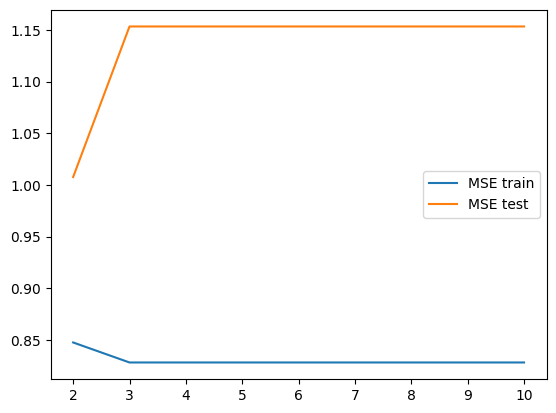

In [13]:
MSE_train_2i = mean_squared_error(y_train, y_train_predicted2i)
MSE_train_3i = mean_squared_error(y_train, y_train_predicted3i)
MSE_train_5i = mean_squared_error(y_train, y_train_predicted5i)
MSE_train_10i = mean_squared_error(y_train, y_train_predicted10i)

MSE_train_i=[MSE_train_2i,MSE_train_3i, MSE_train_5i, MSE_train_10i]

MSE_test_2i = mean_squared_error(y_test, y_test_predicted2i)
MSE_test_3i = mean_squared_error(y_test, y_test_predicted3i)
MSE_test_5i = mean_squared_error(y_test, y_test_predicted5i)
MSE_test_10i = mean_squared_error(y_test, y_test_predicted10i)

MSE_test_i= [MSE_test_2i, MSE_test_3i, MSE_test_5i, MSE_test_10i]

plt.plot(polinom, MSE_train_i, label='MSE train')
plt.plot(polinom, MSE_test_i, label='MSE test')
plt.legend()
plt.show()

In [14]:
print("MSE za polinome s interakcijskim članovima -train")
print(MSE_train_i)
print("MSE za polinome s interakcijskim članovima -test")
print(MSE_test_i)

MSE za polinome s interakcijskim članovima -train
[0.8476116596934253, 0.8282466554598642, 0.8282466554598642, 0.8282466554598642]
MSE za polinome s interakcijskim članovima -test
[1.007630507076708, 1.1532864903357123, 1.1532864903357123, 1.1532864903357123]


Komentirajte dobivene rezultate. Koji model ima najbolje performanse na podskupu za trening, a koji na testu? Je li za ovaj problem prikladnija polinomijalna regresija od linearne regresije? Imaju li utjecaj interakcijski članovi na performanse modela?

______________________________________________________________
Na podskupu za trening najbolje performanse ima polinom 10. reda, a na testu polinom 3. reda ( bez interakcijskih članova). Bolje je koristiti polinomijalnu regresiju jer su za sve polinome vrijednosti MSE-a podjednake. Interakcijskim članovima ostvarujemo podjedanke MSE-ove.
______________________________________________________________

## **Zadatak 3: Preslikavanje u prostor značajki**

Umjesto uvođenja novih (nelinearnih) značajki u model, pokušajte transformirati postojeće značajke. Za početak, za svaku značajku u skupu podataka (TV, Radio, Newspaper), vizualizirajte njezinu vezu s izlaznom varijablom (Sales) pomoću dijagrama raspršenosti. 

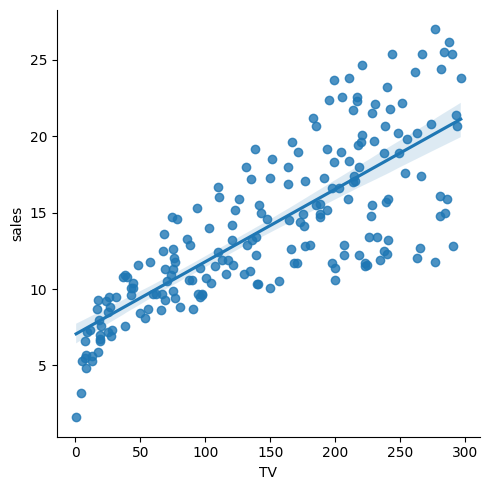

In [15]:
import pandas as pd
import seaborn as sns
from statsmodels.stats import diagnostic


sns.lmplot(x='TV', y='sales', data=data)

# plt.scatter(data['TV'],data['sales'], c='m')
# plt.xlabel('TV')
# plt.ylabel('Sales')
# plt.show()

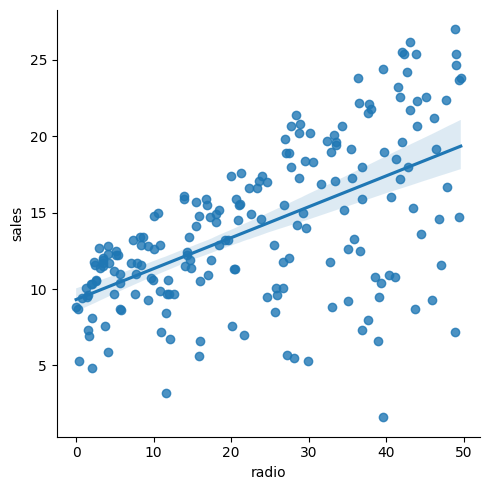

In [16]:
sns.lmplot(x='radio', y='sales', data=data)

# plt.scatter(data['radio'],data['sales'], c='b')
# plt.xlabel('Radio')
# plt.ylabel('Sales')
# plt.show()

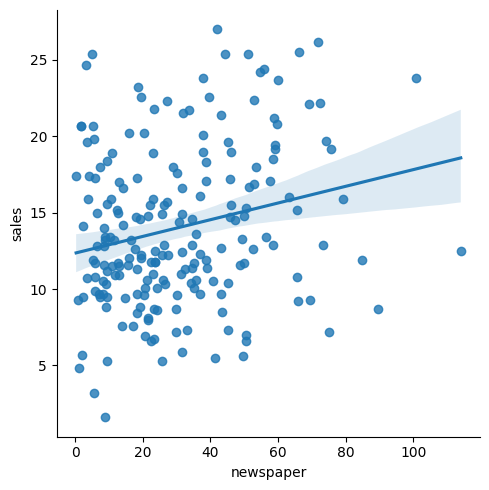

In [17]:
sns.lmplot(x='newspaper', y='sales', data=data)
# plt.scatter(data['newspaper'],data['sales'], c='g')
# plt.xlabel('Newspaper')
# plt.ylabel('Sales')
# plt.show()

Na temelju ovih dijagrama, pokušajte zaključiti kakva je veza svake značajke i izlazne varijable. Pokušajte isprobati neke transformacije nad postojećim značajkama za koje mislite da će njihovu vezu nad izlaznom varijablom svesti u linearan oblik (primjerice, potenciranje, korjenovanje, logaritmiranje, ...).

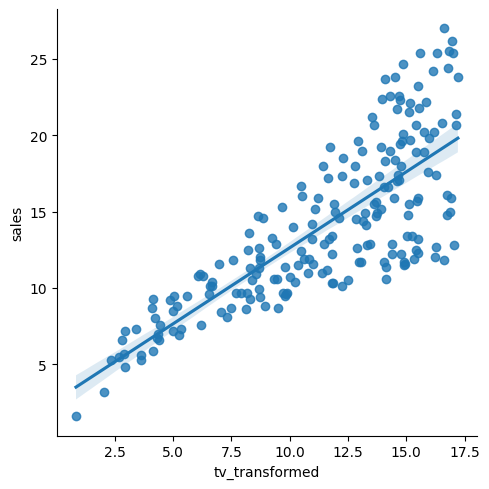

In [18]:
tv_transformed = np.sqrt(data['TV'])
df=data
df['tv_transformed'] = tv_transformed
sns.lmplot(x='tv_transformed', y='sales', data=df)
# plt.scatter(tv_transformed,data['sales'], c='m')
# plt.xlabel('TV')
# plt.ylabel('Sales')
# plt.show()


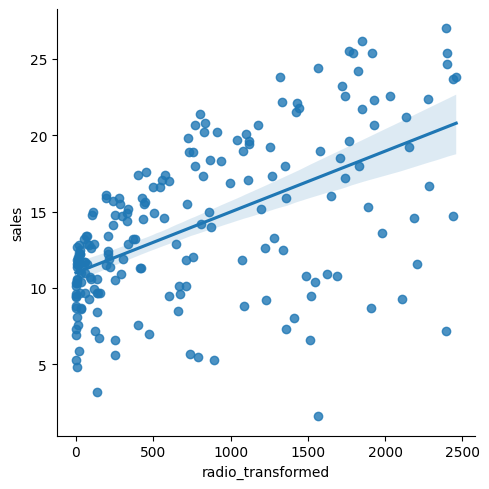

In [19]:
radio_transformed = data['radio']**2
df['radio_transformed'] = radio_transformed
sns.lmplot(x='radio_transformed', y='sales', data=df)

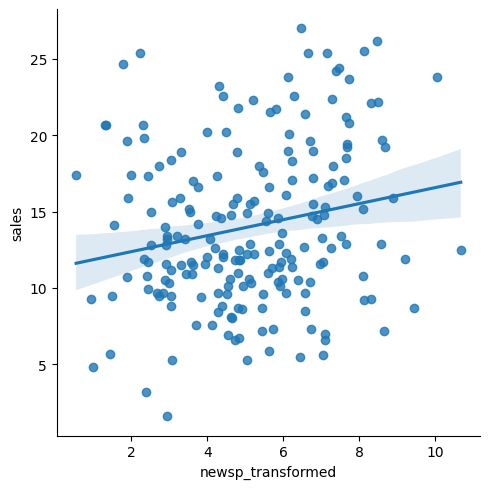

In [20]:
newsp_transformed =np.sqrt(data['newspaper']) #data['newspaper']**2
df['newsp_transformed'] = newsp_transformed
sns.lmplot(x='newsp_transformed', y='sales', data=df)

Ponovno vizualizirajte vezu između svake (sada transformirane) značajke i izlazne varijable te provjerite je li došlo do kakvih promjena. Istrenirajte model linearne regresije s takvim značajkama te ga istrenirajte na podskupu za trening. Izračunajte MSE na podskupovima za trening i test. 

In [21]:
#X = data.iloc[:, :-1]
y = data.iloc[:, -1]

feature_cols = data.columns[:-1]

X_train_t, X_test_t, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)

model = LinearRegression().fit(X_train_t, y_train)

# Predviđene  trening i testnim vrijednosti (nad transformiranim vrijednostima):
y_train_predicted_t = model.predict(X_train_t)
y_test_predicted_t = model.predict(X_test_t)

print('MSE na treningu:', mean_squared_error(y_train, y_train_predicted_t))
print('MSE na testnom skupu podataka:', mean_squared_error(y_test, y_test_predicted_t))


MSE na treningu: 5.155751879192121e-29
MSE na testnom skupu podataka: 6.100853025753e-29


Jeste li uspjeli pronaći neku transformaciju koja poboljšava performanse modela linearne regresije? Prokomentirajte dobivene rezultate.

## **Zadatak 4: Regularizacija**

Kako biste ublažili prenaučenost modela, isprobajte učinak reguralizacije. Testirajte učinak L1 (Lasso) i L2 (Ridge) regularizacije iz biblioteke scikit-learn za gore definirane linearne i nelinearne modele. Možete odabrati najbolji model linearne i najbolji model nelinearne regresije od gore testiranih. Isprobajte nekoliko vrijednosti za parametar $\lambda$. Izračunajte MSE za podskupove za trening i test.


In [22]:
#Lasso is short for Least Absolute Shrinkage and Selection Operator, which is used both for regularization and model selection
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
from statistics import mean


In [28]:
# List to maintain the different values of alpha
alpha = []

mse_ridge = [] 

for i in range(1, 9):
    ridgeModel = Ridge(alpha = i * 0.25)
    ridgeModel.fit(X_train, y_train)
    y_predict_r = ridgeModel.predict(X_test)
    mse_ridge.append(mean_squared_error(y_test, y_predict_r))
    alpha.append(i * 0.25)
 
# Loop to print the different values of MSE
print('alpha : MSE')
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(mse_ridge[i]))

# Building and fitting the Ridge Regression model
ridgeModelChosen = Ridge(alpha = 2)
ridgeModelChosen.fit(X_train, y_train)
 
# Evaluating the Ridge Regression model
print(ridgeModelChosen.score(X_test, y_test))

alpha : MSE
0.25 : 0.2979198626262774
0.5 : 0.29791627423431805
0.75 : 0.2979126860893609
1.0 : 0.29790909819139577
1.25 : 0.29790551054041586
1.5 : 0.29790192313641245
1.75 : 0.2978983359793777
2.0 : 0.2978947490693026
0.9348535981182516


In [31]:
# List to maintain the different values of alpha
alpha = []

mse_ridge = [] 

for i in range(1, 9):
    ridgeModel = Ridge(alpha = i * 0.25)
    ridgeModel.fit(X_train3, y_train)
    y_predict_r = ridgeModel.predict(X_test3)
    mse_ridge.append(mean_squared_error(y_test, y_predict_r))
    alpha.append(i * 0.25)
 
# Loop to print the different values of MSE
print('alpha : MSE')
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(mse_ridge[i]))

# Building and fitting the Ridge Regression model
ridgeModelChosen = Ridge(alpha = 2)
ridgeModelChosen.fit(X_train3, y_train)
 
# Evaluating the Ridge Regression model
print(ridgeModelChosen.score(X_test3, y_test))

# Predviđene  trening i testnim vrijednosti (nad transformiranim vrijednostima):
y_train_predicted_r = ridgeModelChosen.predict(X_train3)
y_test_predicted_r = ridgeModelChosen.predict(X_test3)

print('MSE na treningu:', mean_squared_error(y_train, y_train_predicted_r))
print('MSE na testnom skupu podataka:', mean_squared_error(y_test, y_test_predicted_r))

alpha : MSE
0.25 : 0.12422517707922145
0.5 : 0.12419347129196703
0.75 : 0.12416197707792494
1.0 : 0.12413069375703407
1.25 : 0.12409962065146381
1.5 : 0.12406875708672095
1.75 : 0.1240381023911633
2.0 : 0.12400765589617803
0.9728808493178691
MSE na treningu: 0.009607261117868922
MSE na testnom skupu podataka: 0.12400765589617803


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.7753e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.55059e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.32589e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.11012e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [35]:
# List to maintain the different values of Lambda
Lambda = []

mse_lasso = []

# Loop to compute the cross-validation scores
for i in range(1, 9):
    lassoModel = Lasso(alpha = i * 0.25)
    lassoModel.fit(X_train, y_train)
    y_predict_l = lassoModel.predict(X_test)
    mse_lasso.append(mean_squared_error(y_test, y_predict_l))
    Lambda.append(i * 0.25)
 
# Loop to print the different values of MSE
print('Lambda : MSE')
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(mse_lasso[i]))

# Building and fitting the Lasso Regression Model
lassoModelChosen = Lasso(alpha = 2, tol = 0.0925)
lassoModelChosen.fit(X_train, y_train)
 
# Evaluating the Lasso Regression model
print(f'Lasso model score: {lassoModelChosen.score(X_test, y_test)}')

Lambda : MSE
0.25 : 0.2931757984208102
0.5 : 0.2899189628905719
0.75 : 0.2875439331506448
1.0 : 0.28294061446006386
1.25 : 0.278753011132609
1.5 : 0.27498112316534645
1.75 : 0.27162495056120345
2.0 : 0.268684493320397
Lasso model score: 0.9412405184472022


In [36]:
# List to maintain the different values of Lambda
Lambda = []

mse_lasso = []

# Loop to compute the cross-validation scores
for i in range(1, 9):
    lassoModel = Lasso(alpha = i * 0.25)
    lassoModel.fit(X_train3, y_train)
    y_predict_l = lassoModel.predict(X_test3)
    mse_lasso.append(mean_squared_error(y_test, y_predict_l))
    Lambda.append(i * 0.25)
 
# Loop to print the different values of MSE
print('Lambda : MSE')
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(mse_lasso[i]))

# Building and fitting the Lasso Regression Model
lassoModelChosen = Lasso(alpha = 2, tol = 0.0925)
lassoModelChosen.fit(X_train3, y_train)
 
# Evaluating the Lasso Regression model
print(f'Lasso model score: {lassoModelChosen.score(X_test3, y_test)}')


# Predviđene  trening i testnim vrijednosti (nad transformiranim vrijednostima):
y_train_predicted_l = lassoModelChosen.predict(X_train3)
y_test_predicted_l = lassoModelChosen.predict(X_test3)

print('MSE na treningu:', mean_squared_error(y_train, y_train_predicted_r))
print('MSE na testnom skupu podataka:', mean_squared_error(y_test, y_test_predicted_r))

Lambda : MSE
0.25 : 0.17136126741296492
0.5 : 0.30480156978431605
0.75 : 0.5014148219166643
1.0 : 0.5821360008355583
1.25 : 0.5804844080886795
1.5 : 0.5912192170841294
1.75 : 0.6051578127896526
2.0 : 0.6206962867040346
Lasso model score: 0.9744337812061531
MSE na treningu: 0.009607261117868922
MSE na testnom skupu podataka: 0.12400765589617803


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.478e+00, tolerance: 5.528e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.029e+01, tolerance: 5.528e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.231e+01, tolerance: 5.528e-02

Prokomentirajte dobivene rezultate. Ima li uvođenje regularizacije učinak na performanse modela linearne i nelinearne regresije za promatrani problem?

## **Zadatak 5: Drugi algoritmi za regresiju**

U biblioteci scikit-learn postoje brojni drugi algoritmi strojnog učenja koji se mogu koristiti za potrebe regresije. Evaluirajte učinkovitost tih algoritma na promatranom problemu. Trenirajte modele SVR, DecisionTreeRegressor i KNeighborsRegressor sa zadanim postavkama parametara. Usporedite njihove performanse na podskupu za test s performansama gore definiranih modela regresije. Uz mjeru MSE, za usporedbu koristite i mjere RMSE i MAE.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn . metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

#Support Vector Regression - SVR

# skaliraj ulazne velicine
sc = StandardScaler()
X_train_n = sc.fit_transform(X_train)
X_test_n = sc.transform((X_test))

svr_model = svm.SVR()
svr_model.fit(X_train_n, y_train)
print("SVR")
y_train_p_SVR = svr_model.predict(X_train_n)
y_test_p_SVR = svr_model.predict(X_test_n)

MSE_SVR= mean_squared_error(y_test,y_test_p_SVR)
print(f'MSE: {MSE_SVR}')

RMSE_SVR = math.sqrt(MSE_SVR)
print(f'RMSE: {RMSE_SVR}')

MAE_SVR = mean_absolute_error ( y_test , y_test_p_SVR )
print(f'MAE: {MAE_SVR}')


SVR
MSE: 0.641996600703515
RMSE: 0.8012469037091594
MAE: 0.3550448486955033


In [ ]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn import preprocessing

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train_n, y_train)
print("DecisionTree")
y_train_DT = tree_model.predict(X_train_n)
y_test_DT = tree_model.predict(X_test_n)

MSE_DT= mean_squared_error(y_test,y_test_DT)
print(f'MSE: {MSE_DT}')

RMSE_DT = math.sqrt(MSE_DT)
print(f'RMSE: {RMSE_DT}')

MAE_DT = mean_absolute_error ( y_test , y_test_DT )
print(f'MAE: {MAE_DT}')

DecisionTree
MSE: 0.01835064877509125
RMSE: 0.13546456649283328
MAE: 0.07538106162385351


In [ ]:

# inicijalizacija i ucenje KNN modela
KNN_model = KNeighborsRegressor()
KNN_model.fit( X_train_n, y_train )

# predikcija 
y_train_p_KNN = KNN_model.predict(X_train_n)
y_test_p_KNN = KNN_model.predict(X_test_n)

print('KNN:')

MSE_KNN = mean_squared_error(y_test,y_test_p_KNN)
print(f'MSE: {MSE_KNN}')

RMSE_KNN = math.sqrt(MSE_KNN)
print(f'RMSE: {RMSE_KNN}')

# evaluacija modela na skupu podataka za testiranje pomocu MAE
MAE_KNN = mean_absolute_error ( y_test , y_test_p_KNN )
print(f'MAE: {MAE_KNN}')

MAPE_KNN = mean_absolute_percentage_error(y_test, y_test_p_KNN)
print(f'MAPE: {MAPE_KNN}')

r2_KNN = r2_score(y_test, y_test_p_KNN)
print(f'R^2: {r2_KNN}')


KNN:
MSE: 0.5278605667605383
RMSE: 0.7265401343081731
MAE: 0.46571949935012735
MAPE: 0.16063447938386147
R^2: 0.8845625284529289


In [ ]:
X_train_tv = X_train['TV'].values
#X_test_c = X_test.drop([0], axis=0)
print(X_train_tv)

[284.3 184.9 112.9  23.8 290.7  19.4 293.6  18.7 134.3  25.6 100.4  80.2
 188.4 177.  125.7 209.6 142.9 184.9 222.4 241.7  17.2 120.5  89.7 191.1
  75.5 193.2  85.7 266.9  39.5 261.3  13.2 193.7 296.4 265.6 214.7 149.7
 131.7  57.5 240.1 141.3 180.8  97.2 220.5 140.3 255.4  96.2  66.1 239.3
 175.7 240.1  17.9 230.1 283.6 171.3 199.1 123.1 131.1  25.1 163.5 248.8
 202.5  13.1   4.1  93.9 262.9 228.3 253.8 243.2 239.8 228.  215.4 239.9
 107.4 187.8 206.9  43.  151.5 137.9 182.6 219.8 156.6 276.7 205.   66.9
  76.4  95.7 120.2 225.8  28.6  68.4 248.4 218.5 109.8   8.6  97.5 210.7
 164.5 265.2 281.4  26.8 276.9  36.9 206.8 287.6 102.7 262.7  90.4 199.8
  94.2 210.8 227.2  88.3 237.4 136.2 172.5  17.2  59.6  74.7 149.8 166.8
  44.5 216.4  44.7   0.7 121.  187.9 135.2 139.2 110.7 213.4  18.8 232.1
 218.4 286.  109.8  25.  204.1 217.7 165.6 280.2]
